In [64]:
import pandas as pd

def read_data(file_dir):
    df = pd.read_csv(file_dir)
    return df

In [2]:
import matplotlib.pyplot as plt
import numpy

def visualize_data_rating(df):
    one = 0
    two = 0
    three = 0
    four = 0
    five = 0

    col_name = 'rating'
    X = numpy.arange(5)
    rating = ['1','2','3','4','5']
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    
    for data in df[col_name]:
        if data == 1:
            one += 1
        elif data == 2:
            two += 1
        elif data == 3:
            three += 1
        elif data == 4:
            four += 1
        elif data == 5:
            five += 1
        
    ax.bar(X + 0.00, one, color = 'red', width = 0.25, label = '1')
    ax.bar(X + 0.25, two, color = 'green', width = 0.25, label = '2')
    ax.bar(X + 0.50, three, color = 'blue', width = 0.25, label = '3')
    ax.bar(X + 0.75, four, color = 'yellow', width = 0.25, label = '4')
    ax.bar(X + 0.1, five, color = 'pink', width = 0.25, label = '5')
     
    plt.xticks(X, rating)
    plt.xlabel("Rating")
    plt.ylabel("Jumlah data")
    plt.title("Grafik Rating Pada Ulasan")
    plt.legend()
    plt.show()

In [3]:
import matplotlib.pyplot as plt
import numpy

def visualize_data_aspect(df):
    exist = list()
    not_exist = list()
    
    one = 0
    zero = 0

    aspects = df.columns[:-1]
    X = numpy.arange(len(aspects))
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    
    for col_name in aspects:
        for label in df[col_name]:
            if label == 'pos' or label == 'neg':
                one += 1
            else:
                zero += 1
                
        exist.append(one)
        not_exist.append(zero)
        one = 0
        zero = 0
        
    ax.bar(X + 0.00, exist, color = 'g', width = 0.25, label = 'exist')
    ax.bar(X + 0.25, not_exist, color = 'r', width = 0.25, label = 'not exist')
        
     
    plt.xticks(X, aspects)
    plt.xlabel("Aspek")
    plt.ylabel("Jumlah data")
    plt.title("Grafik data hasil pelabelan aspek")
    plt.legend()
    plt.show()
    
def visualize_data_sentimen(df):
    positive = list()
    negative = list()
    
    one = 0
    zero = 0

    aspects = df.columns[:-1]
    X = numpy.arange(len(aspects))
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    
    for col_name in aspects:
        for label in df[col_name]:
            if label == 'pos':
                one += 1
            elif label == 'neg':
                zero += 1
    
        positive.append(one)
        negative.append(zero)
        one = 0
        zero = 0
        
    ax.bar(X + 0.00, positive, color = 'b', width = 0.25, label = 'positive')
    ax.bar(X + 0.25, negative, color = 'r', width = 0.25, label = 'negative')
     
    plt.xticks(X, aspects)
    plt.xlabel("Aspek")
    plt.ylabel("Jumlah data")
    plt.title("Grafik data hasil pelabelan sentimen")
    plt.legend()
    plt.show()

def visualize_data(df, col_name):
    one = 0
    zero = 0
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    for label in df[col_name]:
        if label == 1:
            one += 1
        else:
            zero += 1
    ax.bar(0.00, [one], color = 'g', width = 0.25)
    ax.bar(0.25, [zero], color = 'r', width = 0.25)

In [25]:
import pickle

a_file = open("kamus.pkl", "rb")
kamus = pickle.load(a_file)

import string

def preprocess1(X):
    preprocessed = list()
    for data in X:
        case_folded = data.lower()
        exclude = set(string.punctuation + '1234567890')
        symbol_removed = ''.join(char for char in case_folded if char not in exclude)
        word_normalized = " ".join([kamus.get(word,word) for word in symbol_removed.split()])
        tokenized = word_normalized.split()
        preprocessed.append(tokenized)
        
    return preprocessed

In [5]:
from nltk.tag import CRFTagger
from nltk import word_tokenize

def pos_tagging(X):
    ct = CRFTagger()
    ct.set_model_file('all_indo_man_tag_corpus_model.crf.tagger')
    pos_tagged_X = ct.tag_sents(X)
    return pos_tagged_X
    
def pos_feature_selection(X):
    pos_tagged_X = pos_tagging(X)
    selected_data = list()
    for i,data in enumerate(pos_tagged_X, start=0):
        temp = list()
        for term in data:
            if term[1] == 'VB' or term[1] == 'NN' or term[1] == 'JJ' or term[1] == 'RB':
                temp.append(term[0])
        selected_data.append(temp)
        
    return selected_data

In [6]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords

def preprocess2(X):
    preprocessed = list()
    for data in X:
        stop = set(stopwords.words('indonesian'))
        stop_removed = [word for word in data if word not in stop]
        factory = StemmerFactory()
        stemmer = factory.create_stemmer()
        stemmed = ' '.join([stemmer.stem(word) for word in stop_removed])
        preprocessed.append(stemmed)
    
    return preprocessed

In [7]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

def apply_oversampling(X, y):
    print('Original dataset shape %s' % Counter(y))
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X, y)
    print('Resampled dataset shape %s' % Counter(y_res))
    return X_res, y_res

In [8]:
#Convert label to negative 0 or positive 1
import numpy

def convert_sentiment_label(df, col_name):
    index_nan = list()
    df2 = df[['Ulasan', col_name]].copy()
    df2[col_name].replace(str("pos"), 1, inplace=True)
    df2[col_name].replace(str("neg"), 0, inplace=True)
    df2[col_name].replace("", float("NaN"), inplace=True)
    df2.dropna(subset=[col_name], inplace=True)
    df2[col_name] = df2[col_name].astype(numpy.int64)
    
    return df2

def convert_aspect_label(df, col_name):
    index_nan = list()
    df2 = df[['Ulasan', col_name]].copy()
    df2[col_name].replace(float("NaN"), 0, inplace=True)
    df2[col_name].replace(str("pos"), 1, inplace=True)
    df2[col_name].replace(str("neg"), 1, inplace=True)
    df2[col_name] = df2[col_name].astype(numpy.int64)
    
    return df2

In [9]:
import sklearn
from sklearn.model_selection import train_test_split

def split_data(df, test_size):
    col_name = df.columns[1]
    words = df.Ulasan.tolist()
    label = df[col_name].tolist()
    x_train, x_test, y_train, y_test = train_test_split(words, label, test_size=test_size)
    return x_train, x_test, y_train, y_test

In [10]:
#https://stackoverflow.com/questions/53294482/how-to-get-tf-idf-scores-for-the-words

from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf_vectorizer(x_train, x_test):
    vectorizer = TfidfVectorizer(sublinear_tf=True)
    vecx_train = vectorizer.fit_transform(x_train).toarray()
    vecx_test = vectorizer.transform(x_test).toarray()
    return vecx_train, vecx_test, vectorizer

In [11]:
from sklearn.naive_bayes import MultinomialNB
from time import time

def train_data_nb(x_train, y_train):
    t0 = time()
    model = MultinomialNB()
    model.fit(x_train, y_train)
    print(f"\nTraining time: {round(time()-t0, 3)}s")
    t0 = time()
    return model

In [12]:
from sklearn import svm

def train_data_svm(x_train, y_train):
    t0 = time()
    model = svm.SVC(kernel='linear')
    model.fit(x_train, y_train)
    print(f"\nTraining time: {round(time()-t0, 3)}s")
    t0 = time()
    return model

In [13]:
def predict_data(text, model):
    data = [text]
    vec_data = vectorizer.transform(data).toarray()
    return model.predict(vec_data)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model(model, vectorized_data, label):
    x_test = vectorized_data
    y_pred = model.predict(x_test)
    print(classification_report(label, y_pred))

In [15]:
from sklearn.model_selection import GridSearchCV

def grid_search_cv(X_train, y_train):
    # defining parameter range
    param_grid = {'C': [0.1, 1, 10], 
                  'gamma': [1, 0.1, 0.01],
                  'kernel': ['linear']} 
  
    grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  
    # fitting the model for grid search
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    print(grid.best_estimator_)
    return grid

In [16]:
def fold_i_of_k(X, y, i, k):
    n = len(y)
    X_train = list() 
    X_val = list()
    y_train = list()
    y_val = list()
    
    for j in range(n):
        if(j >= n*(i-1)//k) and (j < n*i//k):
            X_val.append(X[j])
            y_val.append(y[j])
        else:
            X_train.append(X[j])
            y_train.append(y[j])
            
    return X_train, X_val, y_train, y_val

def kfold_cv(X, y, k, method):
    for i in range(k):
        X_train, X_val, y_train, y_val = fold_i_of_k(X, y, i+1, k)
        if method == 'nb':
            model = train_data_nb(X_train, y_train)
            print('model', i+1, 'created, X_val:', len(X_val), 'y_val', len(y_val))
            evaluate_model(model, X_val, y_val)
        if method == 'svm':
            model = train_data_svm(X_train, y_train)
            print('model', i+1, 'created, X_val:', len(X_val), 'y_val', len(y_val))
            evaluate_model(model, X_val, y_val)

# Run Program!!!

In [18]:
df = read_data("Data skripsi/dataset_ulasan_full.csv")
#df = read_data("Data skripsi/data_ulasan_kai_scraped.csv")
df.head()

,Learnability,Efficiency,Errors,Satisfaction,Ulasan
0,pos,pos,pos,pos,Aplikasi ini sangat membantu saya saat pandemi...
1,pos,pos,pos,pos,Memesan perjalanan lebih mudah
2,NaN,pos,NaN,pos,"KAI smakin bagus pelayananya, krena situasi Pa..."
3,NaN,NaN,NaN,pos,Kedepannya lebih menyenangkan lagi
4,pos,pos,NaN,pos,Sy banyak merasa terbantu


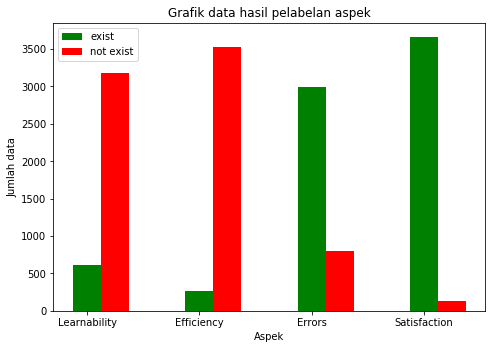

In [19]:
visualize_data_aspect(df)

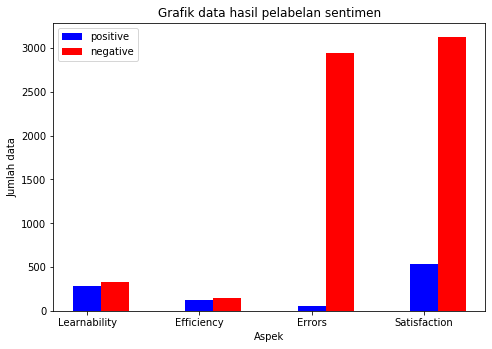

In [20]:
visualize_data_sentimen(df)

In [44]:
#Konversi Label

col_name1 = 'Learnability'
col_name2 = 'Efficiency'
col_name3 = 'Errors'
col_name4 = 'Satisfaction'

df_sentimen1 = convert_sentiment_label(df, col_name1)
df_aspect1 = convert_aspect_label(df, col_name1)

df_sentimen2 = convert_sentiment_label(df, col_name2)
df_aspect2 = convert_aspect_label(df, col_name2)

df_sentimen3 = convert_sentiment_label(df, col_name3)
df_aspect3 = convert_aspect_label(df, col_name3)

df_sentimen4 = convert_sentiment_label(df, col_name4)
df_aspect4 = convert_aspect_label(df, col_name4)

In [59]:
#Dokumentasi Hasil Konversi Label
df_aspect1.to_csv('Dokumentasi/Hasil Konversi Label/df_aspect1.csv', index=False)
df_aspect2.to_csv('Dokumentasi/Hasil Konversi Label/df_aspect2.csv', index=False)
df_aspect3.to_csv('Dokumentasi/Hasil Konversi Label/df_aspect3.csv', index=False)
df_aspect4.to_csv('Dokumentasi/Hasil Konversi Label/df_aspect4.csv', index=False)

df_sentimen1.to_csv('Dokumentasi/Hasil Konversi Label/df_sentimen1.csv', index=False)
df_sentimen2.to_csv('Dokumentasi/Hasil Konversi Label/df_sentimen2.csv', index=False)
df_sentimen3.to_csv('Dokumentasi/Hasil Konversi Label/df_sentimen3.csv', index=False)
df_sentimen4.to_csv('Dokumentasi/Hasil Konversi Label/df_sentimen4.csv', index=False)

In [45]:
#Split Data 

x_train_a1, x_test_a1, y_train_a1, y_test_a1 = split_data(df_aspect1, test_size= 0.2)
x_train_s1, x_test_s1, y_train_s1, y_test_s1 = split_data(df_sentimen1, test_size= 0.2)

x_train_a2, x_test_a2, y_train_a2, y_test_a2 = split_data(df_aspect2, test_size= 0.2)
x_train_s2, x_test_s2, y_train_s2, y_test_s2 = split_data(df_sentimen2, test_size= 0.2)

x_train_a3, x_test_a3, y_train_a3, y_test_a3 = split_data(df_aspect3, test_size= 0.2)
x_train_s3, x_test_s3, y_train_s3, y_test_s3 = split_data(df_sentimen3, test_size= 0.2)

x_train_a4, x_test_a4, y_train_a4, y_test_a4 = split_data(df_aspect4, test_size= 0.2)
x_train_s4, x_test_s4, y_train_s4, y_test_s4 = split_data(df_sentimen4, test_size= 0.2)

In [63]:
#Dokumentasi hasil Splitting Data
def save_list_as_csv(list1, list2, save_dir):
    columns = {}

    columns['X'] = list1
    columns['y'] = list2

    data = list(zip(columns['X'],columns['y']))

    df = pd.DataFrame(data = data)

    df.to_csv(save_dir, index=False, header=['X', 'y'])

save_list_as_csv(x_train_a1, y_train_a1, 'Dokumentasi/Hasil Splitting Data/Label Aspek/Data Latih/a1.csv')
save_list_as_csv(x_train_s1, y_train_s1, 'Dokumentasi/Hasil Splitting Data/Label Sentimen/Data Latih/s1.csv')
save_list_as_csv(x_train_a2, y_train_a2, 'Dokumentasi/Hasil Splitting Data/Label Aspek/Data Latih/a2.csv')
save_list_as_csv(x_train_s2, y_train_s2, 'Dokumentasi/Hasil Splitting Data/Label Sentimen/Data Latih/s2.csv')
save_list_as_csv(x_train_a3, y_train_a3, 'Dokumentasi/Hasil Splitting Data/Label Aspek/Data Latih/a3.csv')
save_list_as_csv(x_train_s3, y_train_s3, 'Dokumentasi/Hasil Splitting Data/Label Sentimen/Data Latih/s3.csv')
save_list_as_csv(x_train_a4, y_train_a4, 'Dokumentasi/Hasil Splitting Data/Label Aspek/Data Latih/a4.csv')
save_list_as_csv(x_train_s4, y_train_s4, 'Dokumentasi/Hasil Splitting Data/Label Sentimen/Data Latih/s4.csv')

save_list_as_csv(x_test_a1, y_test_a1, 'Dokumentasi/Hasil Splitting Data/Label Aspek/Data Uji/a1.csv')
save_list_as_csv(x_test_s1, y_test_s1, 'Dokumentasi/Hasil Splitting Data/Label Sentimen/Data Uji/s1.csv')
save_list_as_csv(x_test_a2, y_test_a2, 'Dokumentasi/Hasil Splitting Data/Label Aspek/Data Uji/a2.csv')
save_list_as_csv(x_test_s2, y_test_s2, 'Dokumentasi/Hasil Splitting Data/Label Sentimen/Data Uji/s2.csv')
save_list_as_csv(x_test_a3, y_test_a3, 'Dokumentasi/Hasil Splitting Data/Label Aspek/Data Uji/a3.csv')
save_list_as_csv(x_test_s3, y_test_s3, 'Dokumentasi/Hasil Splitting Data/Label Sentimen/Data Uji/s3.csv')
save_list_as_csv(x_test_a4, y_test_a4, 'Dokumentasi/Hasil Splitting Data/Label Aspek/Data Uji/a4.csv')
save_list_as_csv(x_test_s4, y_test_s4, 'Dokumentasi/Hasil Splitting Data/Label Sentimen/Data Uji/s4.csv')

In [51]:
for i, x in enumerate(x_train_a1):
    print(i,x)
    if i == 5:
        break

0 Saya selalu pulang naik kereta lokal. bersyukur ada aplikasi ini. Tapi pembayaran hanya bisa melalui linkaja sementara HP saya tak bisa untuk link aja. mungkin kedepan nya tambahkan opsi pembayaran untuk kereta lokal.
1 Saya sangat terbantu mengaksesnya tanpa antrii beli tiket gampang
2 Aplikasi yg sangat membantu untuk mempermudah pemesanan dan pembayaran tiket secara online... sudah tidak ribet lagi harus ke stasiun dengan ini...makin topcer saja????????????
3 Aplikasi gk jelas, masih banyak bug di rilis. gak jelas tiba2 logout sendiri ketika buka di 2 hp. Untuk update nya gak semua OS di update, untuk OS PIE ke bawah gak ikut ke update. Belajar lagi bikin aplikasi baru di rilis... Ujung2 nya malah bikin repot naik KA LOKAL.
4 Tidak bisa di scann harus ke petugas dahulu baru bisa .... semua mesin cetak gak bisa scan dan gak ada tulisanya cetak . Menyusahkan saja apk nya lebih baik pakai apk travel lebih mudah dan cepat tidak ada kendala ... uda gitu petugasnya di jelasin ngotot .. 

In [52]:
#Preprocessing 1

x_train_a1 = preprocess1(x_train_a1); x_test_a1 = preprocess1(x_test_a1)
x_train_s1 = preprocess1(x_train_s1); x_test_s1 = preprocess1(x_test_s1)

x_train_a2 = preprocess1(x_train_a2); x_test_a2 = preprocess1(x_test_a2)
x_train_s2 = preprocess1(x_train_s2); x_test_s2 = preprocess1(x_test_s2)

x_train_a3 = preprocess1(x_train_a3); x_test_a3 = preprocess1(x_test_a3)
x_train_s3 = preprocess1(x_train_s3); x_test_s3 = preprocess1(x_test_s3)

x_train_a4 = preprocess1(x_train_a4); x_test_a4 = preprocess1(x_test_a4)
x_train_s4 = preprocess1(x_train_s4); x_test_s4 = preprocess1(x_test_s4)

In [65]:
#Dokumentasi Hasil Preprocessing 1

save_list_as_csv(x_train_a1, y_train_a1, 'Dokumentasi/Hasil Preprocessing 1/Label Aspek/Data Latih/a1.csv')
save_list_as_csv(x_train_s1, y_train_s1, 'Dokumentasi/Hasil Preprocessing 1/Label Sentimen/Data Latih/s1.csv')
save_list_as_csv(x_train_a2, y_train_a2, 'Dokumentasi/Hasil Preprocessing 1/Label Aspek/Data Latih/a2.csv')
save_list_as_csv(x_train_s2, y_train_s2, 'Dokumentasi/Hasil Preprocessing 1/Label Sentimen/Data Latih/s2.csv')
save_list_as_csv(x_train_a3, y_train_a3, 'Dokumentasi/Hasil Preprocessing 1/Label Aspek/Data Latih/a3.csv')
save_list_as_csv(x_train_s3, y_train_s3, 'Dokumentasi/Hasil Preprocessing 1/Label Sentimen/Data Latih/s3.csv')
save_list_as_csv(x_train_a4, y_train_a4, 'Dokumentasi/Hasil Preprocessing 1/Label Aspek/Data Latih/a4.csv')
save_list_as_csv(x_train_s4, y_train_s4, 'Dokumentasi/Hasil Preprocessing 1/Label Sentimen/Data Latih/s4.csv')

save_list_as_csv(x_test_a1, y_test_a1, 'Dokumentasi/Hasil Preprocessing 1/Label Aspek/Data Uji/a1.csv')
save_list_as_csv(x_test_s1, y_test_s1, 'Dokumentasi/Hasil Preprocessing 1/Label Sentimen/Data Uji/s1.csv')
save_list_as_csv(x_test_a2, y_test_a2, 'Dokumentasi/Hasil Preprocessing 1/Label Aspek/Data Uji/a2.csv')
save_list_as_csv(x_test_s2, y_test_s2, 'Dokumentasi/Hasil Preprocessing 1/Label Sentimen/Data Uji/s2.csv')
save_list_as_csv(x_test_a3, y_test_a3, 'Dokumentasi/Hasil Preprocessing 1/Label Aspek/Data Uji/a3.csv')
save_list_as_csv(x_test_s3, y_test_s3, 'Dokumentasi/Hasil Preprocessing 1/Label Sentimen/Data Uji/s3.csv')
save_list_as_csv(x_test_a4, y_test_a4, 'Dokumentasi/Hasil Preprocessing 1/Label Aspek/Data Uji/a4.csv')
save_list_as_csv(x_test_s4, y_test_s4, 'Dokumentasi/Hasil Preprocessing 1/Label Sentimen/Data Uji/s4.csv')

In [53]:
for i, x in enumerate(x_train_a1):
    print(i,x)
    if i == 5:
        break

0 ['saya', 'selalu', 'pulang', 'naik', 'kereta', 'lokal', 'bersyukur', 'ada', 'aplikasi', 'ini', 'tapi', 'pembayaran', 'hanya', 'bisa', 'melalui', 'linkaja', 'sementara', 'telepon', 'saya', 'tak', 'bisa', 'untuk', 'link', 'aja', 'mungkin', 'ke', 'depan', 'nya', 'tambahkan', 'opsi', 'pembayaran', 'untuk', 'kereta', 'lokal']
1 ['saya', 'sangat', 'terbantu', 'mengaksesnya', 'tanpa', 'antre', 'beli', 'tiket', 'gampang']
2 ['aplikasi', 'yang', 'sangat', 'membantu', 'untuk', 'mempermudah', 'booking', 'dan', 'pembayaran', 'tiket', 'secara', 'online', 'sudah', 'tidak', 'ribet', 'lagi', 'harus', 'ke', 'stasiun', 'dengan', 'ini', 'semakin', 'topcer', 'saja']
3 ['aplikasi', 'enggak', 'jelas', 'masih', 'banyak', 'bug', 'di', 'rilis', 'enggak', 'jelas', 'tiba', 'logout', 'sendiri', 'ketika', 'buka', 'di', 'telepon', 'untuk', 'update', 'nya', 'enggak', 'semua', 'os', 'di', 'update', 'untuk', 'os', 'bagaimana', 'ke', 'bawah', 'tolong', 'enggak', 'ikut', 'ke', 'update', 'belajar', 'lagi', 'bikin', 'ap

In [69]:
#Pos Tagging untuk data ulasan klasifikasi sentimen

x_train_s1 = pos_feature_selection(x_train_s1)
x_test_s1 = pos_feature_selection(x_test_s1)

x_train_s2 = pos_feature_selection(x_train_s2)
x_test_s2 = pos_feature_selection(x_test_s2)

x_train_s3 = pos_feature_selection(x_train_s3)
x_test_s3 = pos_feature_selection(x_test_s3)

x_train_s4 = pos_feature_selection(x_train_s4)
x_test_s4 = pos_feature_selection(x_test_s4)

In [70]:
#Dokumentasi Hasil Seleksi POS

save_list_as_csv(x_train_a1, y_train_a1, 'Dokumentasi/Hasil Seleksi POS/Label Aspek/Data Latih/a1.csv')
save_list_as_csv(x_train_s1, y_train_s1, 'Dokumentasi/Hasil Seleksi POS/Label Sentimen/Data Latih/s1.csv')
save_list_as_csv(x_train_a2, y_train_a2, 'Dokumentasi/Hasil Seleksi POS/Label Aspek/Data Latih/a2.csv')
save_list_as_csv(x_train_s2, y_train_s2, 'Dokumentasi/Hasil Seleksi POS/Label Sentimen/Data Latih/s2.csv')
save_list_as_csv(x_train_a3, y_train_a3, 'Dokumentasi/Hasil Seleksi POS/Label Aspek/Data Latih/a3.csv')
save_list_as_csv(x_train_s3, y_train_s3, 'Dokumentasi/Hasil Seleksi POS/Label Sentimen/Data Latih/s3.csv')
save_list_as_csv(x_train_a4, y_train_a4, 'Dokumentasi/Hasil Seleksi POS/Label Aspek/Data Latih/a4.csv')
save_list_as_csv(x_train_s4, y_train_s4, 'Dokumentasi/Hasil Seleksi POS/Label Sentimen/Data Latih/s4.csv')

save_list_as_csv(x_test_a1, y_test_a1, 'Dokumentasi/Hasil Seleksi POS/Label Aspek/Data Uji/a1.csv')
save_list_as_csv(x_test_s1, y_test_s1, 'Dokumentasi/Hasil Seleksi POS/Label Sentimen/Data Uji/s1.csv')
save_list_as_csv(x_test_a2, y_test_a2, 'Dokumentasi/Hasil Seleksi POS/Label Aspek/Data Uji/a2.csv')
save_list_as_csv(x_test_s2, y_test_s2, 'Dokumentasi/Hasil Seleksi POS/Label Sentimen/Data Uji/s2.csv')
save_list_as_csv(x_test_a3, y_test_a3, 'Dokumentasi/Hasil Seleksi POS/Label Aspek/Data Uji/a3.csv')
save_list_as_csv(x_test_s3, y_test_s3, 'Dokumentasi/Hasil Seleksi POS/Label Sentimen/Data Uji/s3.csv')
save_list_as_csv(x_test_a4, y_test_a4, 'Dokumentasi/Hasil Seleksi POS/Label Aspek/Data Uji/a4.csv')
save_list_as_csv(x_test_s4, y_test_s4, 'Dokumentasi/Hasil Seleksi POS/Label Sentimen/Data Uji/s4.csv')

In [90]:
#Preprocess 2

x_train_a1 = preprocess2(x_train_a1); x_test_a1 = preprocess2(x_test_a1)
x_train_s1 = preprocess2(x_train_s1); x_test_s1 = preprocess2(x_test_s1)

x_train_a2 = preprocess2(x_train_a2); x_test_a2 = preprocess2(x_test_a2)
x_train_s2 = preprocess2(x_train_s2); x_test_s2 = preprocess2(x_test_s2)

x_train_a3 = preprocess2(x_train_a3); x_test_a3 = preprocess2(x_test_a3)
x_train_s3 = preprocess2(x_train_s3); x_test_s3 = preprocess2(x_test_s3)

x_train_a4 = preprocess2(x_train_a4); x_test_a4 = preprocess2(x_test_a4)
x_train_s4 = preprocess2(x_train_s4); x_test_s4 = preprocess2(x_test_s4)

In [91]:
#Dokumentasi Hasil Preprocessing 2

save_list_as_csv(x_train_a1, y_train_a1, 'Dokumentasi/Hasil Preprocessing 2/Label Aspek/Data Latih/a1.csv')
save_list_as_csv(x_train_s1, y_train_s1, 'Dokumentasi/Hasil Preprocessing 2/Label Sentimen/Data Latih/s1.csv')
save_list_as_csv(x_train_a2, y_train_a2, 'Dokumentasi/Hasil Preprocessing 2/Label Aspek/Data Latih/a2.csv')
save_list_as_csv(x_train_s2, y_train_s2, 'Dokumentasi/Hasil Preprocessing 2/Label Sentimen/Data Latih/s2.csv')
save_list_as_csv(x_train_a3, y_train_a3, 'Dokumentasi/Hasil Preprocessing 2/Label Aspek/Data Latih/a3.csv')
save_list_as_csv(x_train_s3, y_train_s3, 'Dokumentasi/Hasil Preprocessing 2/Label Sentimen/Data Latih/s3.csv')
save_list_as_csv(x_train_a4, y_train_a4, 'Dokumentasi/Hasil Preprocessing 2/Label Aspek/Data Latih/a4.csv')
save_list_as_csv(x_train_s4, y_train_s4, 'Dokumentasi/Hasil Preprocessing 2/Label Sentimen/Data Latih/s4.csv')

save_list_as_csv(x_test_a1, y_test_a1, 'Dokumentasi/Hasil Preprocessing 2/Label Aspek/Data Uji/a1.csv')
save_list_as_csv(x_test_s1, y_test_s1, 'Dokumentasi/Hasil Preprocessing 2/Label Sentimen/Data Uji/s1.csv')
save_list_as_csv(x_test_a2, y_test_a2, 'Dokumentasi/Hasil Preprocessing 2/Label Aspek/Data Uji/a2.csv')
save_list_as_csv(x_test_s2, y_test_s2, 'Dokumentasi/Hasil Preprocessing 2/Label Sentimen/Data Uji/s2.csv')
save_list_as_csv(x_test_a3, y_test_a3, 'Dokumentasi/Hasil Preprocessing 2/Label Aspek/Data Uji/a3.csv')
save_list_as_csv(x_test_s3, y_test_s3, 'Dokumentasi/Hasil Preprocessing 2/Label Sentimen/Data Uji/s3.csv')
save_list_as_csv(x_test_a4, y_test_a4, 'Dokumentasi/Hasil Preprocessing 2/Label Aspek/Data Uji/a4.csv')
save_list_as_csv(x_test_s4, y_test_s4, 'Dokumentasi/Hasil Preprocessing 2/Label Sentimen/Data Uji/s4.csv')

In [103]:
#Ekstraksi fitur TF-IDF

vx_train_a1, vx_test_a1, vectorizer_a1 = tfidf_vectorizer(x_train_a1, x_test_a1) #Untuk klasifikasi aspek
vx_train_s1, vx_test_s1, vectorizer_s1 = tfidf_vectorizer(x_train_s1, x_test_s1) #Untuk klasifikasi sentimen

vx_train_a2, vx_test_a2, vectorizer_a2 = tfidf_vectorizer(x_train_a2, x_test_a2) #Untuk klasifikasi aspek
vx_train_s2, vx_test_s2, vectorizer_s2 = tfidf_vectorizer(x_train_s2, x_test_s2) #Untuk klasifikasi sentimen

vx_train_a3, vx_test_a3, vectorizer_a3 = tfidf_vectorizer(x_train_a3, x_test_a3) #Untuk klasifikasi aspek
vx_train_s3, vx_test_s3, vectorizer_s3 = tfidf_vectorizer(x_train_s3, x_test_s3) #Untuk klasifikasi sentimen

vx_train_a4, vx_test_a4, vectorizer_a4 = tfidf_vectorizer(x_train_a4, x_test_a4) #Untuk klasifikasi aspek
vx_train_s4, vx_test_s4, vectorizer_s4 = tfidf_vectorizer(x_train_s4, x_test_s4) #Untuk klasifikasi sentimen

In [133]:
print(len(vectorizer_a1.get_feature_names()))
print(len(vectorizer_a2.get_feature_names()))
print(len(vectorizer_a3.get_feature_names()))
print(len(vectorizer_a4.get_feature_names()))
print('----')
print(len(vectorizer_s1.get_feature_names()))
print(len(vectorizer_s2.get_feature_names()))
print(len(vectorizer_s3.get_feature_names()))
print(len(vectorizer_s4.get_feature_names()))

2724
2721
2721
2725
----
1149
718
2293
2487


In [143]:
#Dokumentasi Hasil Ekstraksi Fitur TF-IDF

vadf1 = pd.DataFrame(vx_train_a1, columns=vectorizer_a1.get_feature_names())
vadf2 = pd.DataFrame(vx_train_a2, columns=vectorizer_a2.get_feature_names())
vadf3 = pd.DataFrame(vx_train_a3, columns=vectorizer_a3.get_feature_names())
vadf4 = pd.DataFrame(vx_train_a4, columns=vectorizer_a4.get_feature_names())

vsdf1 = pd.DataFrame(vx_train_s1, columns=vectorizer_s1.get_feature_names())
vsdf2 = pd.DataFrame(vx_train_s2, columns=vectorizer_s2.get_feature_names())
vsdf3 = pd.DataFrame(vx_train_s3, columns=vectorizer_s3.get_feature_names())
vsdf4 = pd.DataFrame(vx_train_s4, columns=vectorizer_s4.get_feature_names())

vadf1.to_csv('Dokumentasi/Hasil Ekstraksi Fitur TF-IDF/Label Aspek/s1.csv')
vadf2.to_csv('Dokumentasi/Hasil Ekstraksi Fitur TF-IDF/Label Aspek/s2.csv')
vadf3.to_csv('Dokumentasi/Hasil Ekstraksi Fitur TF-IDF/Label Aspek/s3.csv')
vadf4.to_csv('Dokumentasi/Hasil Ekstraksi Fitur TF-IDF/Label Aspek/s4.csv')

vsdf1.to_csv('Dokumentasi/Hasil Ekstraksi Fitur TF-IDF/Label Sentimen/s1.csv')
vsdf2.to_csv('Dokumentasi/Hasil Ekstraksi Fitur TF-IDF/Label Sentimen/s2.csv')
vsdf3.to_csv('Dokumentasi/Hasil Ekstraksi Fitur TF-IDF/Label Sentimen/s3.csv')
vsdf4.to_csv('Dokumentasi/Hasil Ekstraksi Fitur TF-IDF/Label Sentimen/s4.csv')

In [169]:
import pickle

pickle.dump(vectorizer_a1, open("Dokumentasi/Hasil Ekstraksi Fitur TF-IDF/Label Aspek/vectorizer_a1.pickle", "wb"))
pickle.dump(vx_train_a1, open("Dokumentasi/Hasil Ekstraksi Fitur TF-IDF/Label Aspek/vx_train_a1.pickle", "wb"))
pickle.dump(vx_test_a1, open("Dokumentasi/Hasil Ekstraksi Fitur TF-IDF/Label Aspek/vx_test_a1.pickle", "wb"))

pickle.dump(vectorizer_a2, open("Dokumentasi/Hasil Ekstraksi Fitur TF-IDF/Label Aspek/vectorizer_a2.pickle", "wb"))
pickle.dump(vx_train_a2, open("Dokumentasi/Hasil Ekstraksi Fitur TF-IDF/Label Aspek/vx_train_a2.pickle", "wb"))
pickle.dump(vx_test_a2, open("Dokumentasi/Hasil Ekstraksi Fitur TF-IDF/Label Aspek/vx_test_a2.pickle", "wb"))

pickle.dump(vectorizer_a3, open("Dokumentasi/Hasil Ekstraksi Fitur TF-IDF/Label Aspek/vectorizer_a3.pickle", "wb"))
pickle.dump(vx_train_a3, open("Dokumentasi/Hasil Ekstraksi Fitur TF-IDF/Label Aspek/vx_train_a3.pickle", "wb"))
pickle.dump(vx_test_a3, open("Dokumentasi/Hasil Ekstraksi Fitur TF-IDF/Label Aspek/vx_test_a3.pickle", "wb"))

pickle.dump(vectorizer_a4, open("Dokumentasi/Hasil Ekstraksi Fitur TF-IDF/Label Aspek/vectorizer_a4.pickle", "wb"))
pickle.dump(vx_train_a4, open("Dokumentasi/Hasil Ekstraksi Fitur TF-IDF/Label Aspek/vx_train_a4.pickle", "wb"))
pickle.dump(vx_test_a4, open("Dokumentasi/Hasil Ekstraksi Fitur TF-IDF/Label Aspek/vx_test_a4.pickle", "wb"))


pickle.dump(vectorizer_s1, open("Dokumentasi/Hasil Ekstraksi Fitur TF-IDF/Label Sentimen/vectorizer_s1.pickle", "wb"))
pickle.dump(vx_train_s1, open("Dokumentasi/Hasil Ekstraksi Fitur TF-IDF/Label Sentimen/vx_train_s1.pickle", "wb"))
pickle.dump(vx_test_s1, open("Dokumentasi/Hasil Ekstraksi Fitur TF-IDF/Label Sentimen/vx_test_s1.pickle", "wb"))

pickle.dump(vectorizer_s2, open("Dokumentasi/Hasil Ekstraksi Fitur TF-IDF/Label Sentimen/vectorizer_s2.pickle", "wb"))
pickle.dump(vx_train_s2, open("Dokumentasi/Hasil Ekstraksi Fitur TF-IDF/Label Sentimen/vx_train_s2.pickle", "wb"))
pickle.dump(vx_test_s2, open("Dokumentasi/Hasil Ekstraksi Fitur TF-IDF/Label Sentimen/vx_test_s2.pickle", "wb"))

pickle.dump(vectorizer_s3, open("Dokumentasi/Hasil Ekstraksi Fitur TF-IDF/Label Sentimen/vectorizer_s3.pickle", "wb"))
pickle.dump(vx_train_s3, open("Dokumentasi/Hasil Ekstraksi Fitur TF-IDF/Label Sentimen/vx_train_s3.pickle", "wb"))
pickle.dump(vx_test_s3, open("Dokumentasi/Hasil Ekstraksi Fitur TF-IDF/Label Sentimen/vx_test_s3.pickle", "wb"))

pickle.dump(vectorizer_s4, open("Dokumentasi/Hasil Ekstraksi Fitur TF-IDF/Label Sentimen/vectorizer_s4.pickle", "wb"))
pickle.dump(vx_train_s4, open("Dokumentasi/Hasil Ekstraksi Fitur TF-IDF/Label Sentimen/vx_train_s4.pickle", "wb"))
pickle.dump(vx_test_s4, open("Dokumentasi/Hasil Ekstraksi Fitur TF-IDF/Label Sentimen/vx_test_s4.pickle", "wb"))

In [179]:
#vectorizer_a1.
gaga = "metode bayar rumit efisien ikut instruksi bayar link aja cari menu dompet elektronik menu link aja menu tolong"
asasa = vectorizer_a1.transform(x_test_a1).toarray()
haha = pd.DataFrame(asasa, columns=vectorizer_a1.get_feature_names())[gaga.split()]
haha.iloc[0]

metode        0.347454
bayar         0.215355
rumit         0.372511
efisien       0.436963
ikut          0.208215
instruksi     0.259459
bayar         0.215355
link          0.189879
aja           0.152347
cari          0.155016
menu          0.346540
dompet        0.259459
elektronik    0.237694
menu          0.346540
link          0.189879
aja           0.152347
menu          0.346540
tolong        0.090679
Name: 0, dtype: float64

In [171]:
#Oversampling

vx_train_a1, y_train_a1 = apply_oversampling(vx_train_a1, y_train_a1) #Oversampling data untuk klasifikasi aspek
vx_train_s1, y_train_s1 = apply_oversampling(vx_train_s1, y_train_s1) #Oversampling data untuk klasifikasi aspek
print('------------------------------------------')
vx_train_a2, y_train_a2 = apply_oversampling(vx_train_a2, y_train_a2) #Oversampling data untuk klasifikasi aspek
vx_train_s2, y_train_s2 = apply_oversampling(vx_train_s2, y_train_s2) #Oversampling data untuk klasifikasi aspek
print('------------------------------------------')
vx_train_a3, y_train_a3 = apply_oversampling(vx_train_a3, y_train_a3) #Oversampling data untuk klasifikasi aspek
vx_train_s3, y_train_s3 = apply_oversampling(vx_train_s3, y_train_s3) #Oversampling data untuk klasifikasi aspek
print('------------------------------------------')
vx_train_a4, y_train_a4 = apply_oversampling(vx_train_a4, y_train_a4) #Oversampling data untuk klasifikasi aspek
vx_train_s4, y_train_s4 = apply_oversampling(vx_train_s4, y_train_s4) #Oversampling data untuk klasifikasi aspek

Original dataset shape Counter({0: 2544, 1: 489})
Resampled dataset shape Counter({0: 2544, 1: 2544})
Original dataset shape Counter({0: 273, 1: 220})
Resampled dataset shape Counter({0: 273, 1: 273})
------------------------------------------
Original dataset shape Counter({0: 2817, 1: 216})
Resampled dataset shape Counter({0: 2817, 1: 2817})
Original dataset shape Counter({0: 113, 1: 100})
Resampled dataset shape Counter({1: 113, 0: 113})
------------------------------------------
Original dataset shape Counter({1: 2420, 0: 613})
Resampled dataset shape Counter({1: 2420, 0: 2420})
Original dataset shape Counter({0: 2351, 1: 46})
Resampled dataset shape Counter({0: 2351, 1: 2351})
------------------------------------------
Original dataset shape Counter({1: 2933, 0: 100})
Resampled dataset shape Counter({1: 2933, 0: 2933})
Original dataset shape Counter({0: 2513, 1: 419})
Resampled dataset shape Counter({0: 2513, 1: 2513})


# Multi-NB

In [36]:
#Model Training Multi-NB

model_nb_a1 = train_data_nb(vx_train_a1, y_train_a1) #Training Model klasifikasi aspek 
print('--------------------------------------------------------')
model_nb_s1 = train_data_nb(vx_train_s1, y_train_s1) #Training Model klasifikasi sentimen


Training time: 0.038s
--------------------------------------------------------

Training time: 0.005s


In [37]:
print(evaluate_model(model_nb_a1, vx_test_a1, y_test_a1))
print('-----------------------------------------')
print(evaluate_model(model_nb_s1, vx_test_s1, y_test_s1))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74       637
           1       0.14      0.29      0.19       122

    accuracy                           0.60       759
   macro avg       0.49      0.48      0.46       759
weighted avg       0.72      0.60      0.65       759

None
-----------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.78      0.72        68
           1       0.66      0.52      0.58        56

    accuracy                           0.66       124
   macro avg       0.66      0.65      0.65       124
weighted avg       0.66      0.66      0.65       124

None


In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

ypred = model_nb_a1.predict(vx_test_a1)
accuracy = precision_score(y_test_a1, ypred)
accuracy

0.14112903225806453

In [39]:
kfold_cv(vx_train_a1, y_train_a1, 5, 'nb')


Training time: 0.06s
model 1 created, X_val: 1015 y_val 1015
              precision    recall  f1-score   support

           0       0.98      0.30      0.46       867
           1       0.19      0.97      0.32       148

    accuracy                           0.40      1015
   macro avg       0.59      0.63      0.39      1015
weighted avg       0.87      0.40      0.44      1015


Training time: 0.054s
model 2 created, X_val: 1015 y_val 1015
              precision    recall  f1-score   support

           0       0.98      0.30      0.46       838
           1       0.23      0.97      0.37       177

    accuracy                           0.42      1015
   macro avg       0.60      0.63      0.41      1015
weighted avg       0.85      0.42      0.44      1015


Training time: 0.054s
model 3 created, X_val: 1015 y_val 1015
              precision    recall  f1-score   support

           0       0.97      0.29      0.45       833
           1       0.23      0.96      0.37      

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248:

# SVM

In [40]:
#Model Training SVM

model_svm_a1 = train_data_svm(vx_train_a1, y_train_a1) #Training Model klasifikasi aspek 
print('----------------------------------------------------------')
model_svm_s1 = train_data_svm(vx_train_s1, y_train_s1) #Training Model klasifikasi sentimen 



Training time: 25.54s
----------------------------------------------------------

Training time: 0.086s


In [41]:
print(evaluate_model(model_svm_a1, vx_test_a1, y_test_a1))
print('-----------------------------------------')
print(evaluate_model(model_svm_s1, vx_test_s1, y_test_s1))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76       637
           1       0.13      0.24      0.17       122

    accuracy                           0.63       759
   macro avg       0.48      0.47      0.46       759
weighted avg       0.72      0.63      0.66       759

None
-----------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.71      0.66        68
           1       0.57      0.48      0.52        56

    accuracy                           0.60       124
   macro avg       0.60      0.59      0.59       124
weighted avg       0.60      0.60      0.60       124

None


# SVM with GridSearchCV

In [68]:
#Model Training SVM dengan GridSearchCV

grid_svm1 = grid_search_cv(vx_train1, y_train1) #Untuk Model klasifikasi aspek 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.624 total time=  55.5s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.673 total time=  56.8s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.704 total time=  57.6s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.717 total time=  58.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.702 total time=  55.9s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.624 total time=  55.5s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.673 total time=  57.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.704 total time=  56.9s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.717 total time=  56.7s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.702 total time=  57.1s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.624 total time=  56.1s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;,

In [ ]:
#grid_svm2 = grid_search_cv(vx_train2, y_train2) #Untuk Model klasifikasi sentimen 

In [69]:
print(evaluate_model(grid_svm1, vx_test1, y_test1))

              precision    recall  f1-score   support

           0       0.27      0.33      0.29       145
           1       0.83      0.78      0.81       614

    accuracy                           0.70       759
   macro avg       0.55      0.56      0.55       759
weighted avg       0.72      0.70      0.71       759

None


In [19]:
#SOurce: https://towardsdatascience.com/training-a-naive-bayes-model-to-identify-the-author-of-an-email-or-document-17dc85fa630a